# Bonus: The Equation of State

This bonus exercise focuses on the dimensionless number $w$ from the equation of state. Assuming a constant dark energy equation of state, determine the value of $w$ that agrees with observation.

1. Using the wCDM (or FlatwCDM, if you prefer) class, set the following parameters: $H_0 = 68$km/s/Mpc, $\Omega_{m,0} = 0.3$, $\Omega_{\Lambda, 0} = 0.7$
2. Create a new model, and repeat all calculations, for the following key values: $w= 1, 1/3, 0, -1/3, -2/3, -1$
3. For each model, plot the expansion of the universe (using a quantity of your choice) against lookback time. Include observation data from either Planck or WMAP.
4. What can you learn from your plot? Determine an appropriate value for $w$.

Solution below...

---









In [1]:
!pip install astropy

In [2]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astropy.cosmology import wCDM, WMAP9

To investigate the various key values of *w*, we can make a function that takes *w* as an argument. Here, it returns the lookback time and scale factor at a particular redshift, within a cosmological model. We have chosen current values of density parameters $\Omega_{m,0} = 0.3, \Omega_{\Lambda, 0} = 0.7$

In [3]:
wvals = [1, 0.33, 0, -0.33, -0.67, -1]  # key values of w to test
zvals = np.arange(0, 1000, 0.1)  # redshift values

In [4]:
def cosmoFunc(w, z):
    cosmo = wCDM(H0=68 * u.km / u.s / u.Mpc, Om0=0.3, Ode0=0.7, w0=w)
    lb = cosmo.lookback_time(z)  # lookback time
    sf = cosmo.scale_factor(z)  # scale factor
    return lb, sf

Astropy has several in-built cosmologies using data from Planck and WMAP, so we can easily include observational data to compare our models to.

In [5]:
wmap_sf = WMAP9.scale_factor(zvals)
wmap_lb = WMAP9.lookback_time(zvals)

We can plot the scale factor against lookback time for each model, including data from Planck as a comparison.

You can see that for each model, the current scale factor is 1, and the scale factor at the Big Bang was 0. But each curve has a different time-dependency, leading to very different estimates in the age of the universe. Comparing to the WMAP 9-year data, we can conclude that $w=-1$ is the closest, giving us an equation of state:
$p = - \rho c^2 $

Text(0, 0.5, 'Scale Factor')

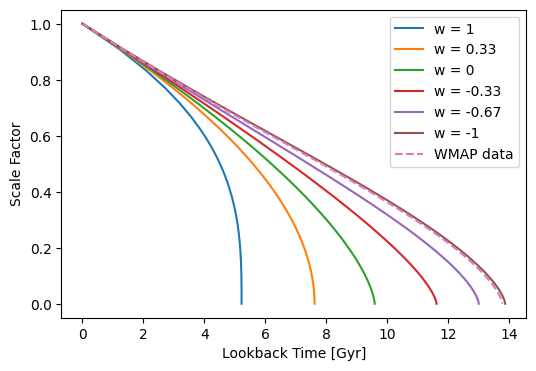

In [6]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for val in wvals:
  lb_vals, sf_vals = cosmoFunc(val, zvals)
  label = 'w = ' + str(val)
  ax.plot(lb_vals, sf_vals, label=label)

ax.plot(wmap_lb, wmap_sf, label='WMAP data', linestyle='dashed')

ax.legend()
ax.set_xlabel('Lookback Time [Gyr]')
ax.set_ylabel('Scale Factor')